Take a SDOF system 

we take the simplest SDOF system - spring-mass-damper system

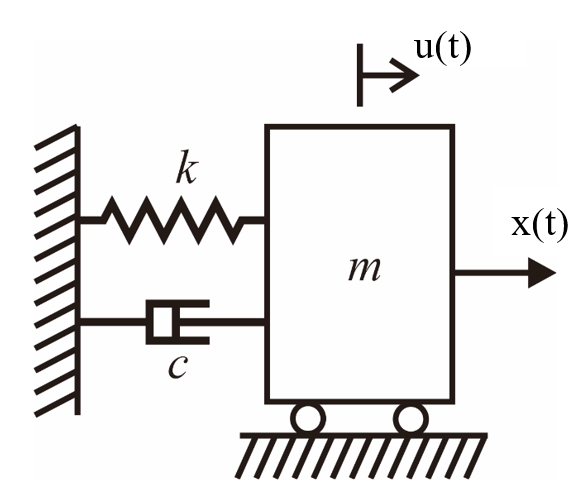

We know how to write the equation of motion

$$ \mathbf{m} \ddot{\mathbf{y}} + \mathbf{c} \dot{\mathbf{y}} + \mathbf{k} \mathbf{y} = \mathbf{x}(t) $$

In [1]:
import numpy as np
import sys
sys.path.append('./../modules')
from time_integration import * # Import all functions in the module time_integration
import matplotlib.pyplot as plt


In [2]:
# Define structural properties

m = np.array([[1.0]]) 
k = np.array([[100.0]])
w_n = np.sqrt(k/m)
c = 2*m*w_n*0.05

w_n

array([[10.]])

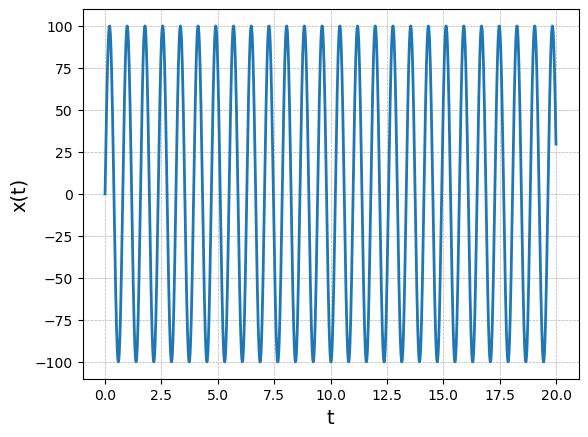

In [8]:
dt = 0.01 #Time step
t = np.arange(0.,20.,dt) # Time vector

# define harmonic load
wl = 8 # load frequency
A = 100 #amplitude
X = A*np.array([np.sin(wl*t)])

# plot the time series of the loading      
plt.plot(t,X[0,:], linewidth=2)
plt.xlabel('t', fontsize=14)
plt.ylabel('x(t)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


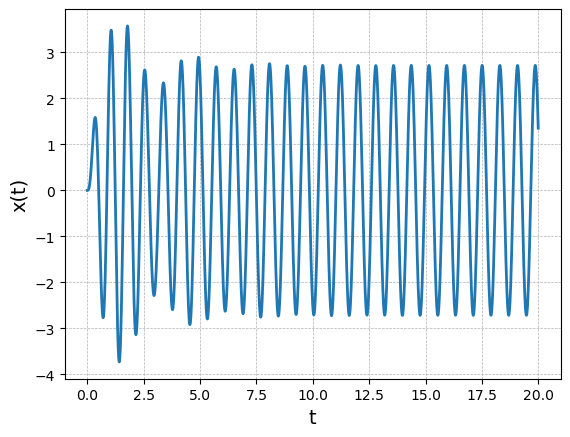

In [9]:
# calulate the response
beta = 1.0/4.0 # Facor in Newmark's method
gamma = 1.0/2.0 # Factor in Newmark's method
u0 = np.array([[0.0]]) #Initial displacement
udot0 = np.array([[0.0]]) # Initial velocity
y, ydot, y2dot = linear_newmark_krenk(m,c,k,X,u0,udot0,dt,gamma,beta)

# plot the response
# plot the time series of the loading      
plt.plot(t,y[0,:], linewidth=2)
plt.xlabel('t', fontsize=14)
plt.ylabel('y(t)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



So what happens if we have stochastic loading?

We do not know the actual time series of the loading as it is a stochastic process such as wave or wind loading. We only know about its statistics. 

If we look at a realization of the loading, we can calculate the response in a similar manner. 

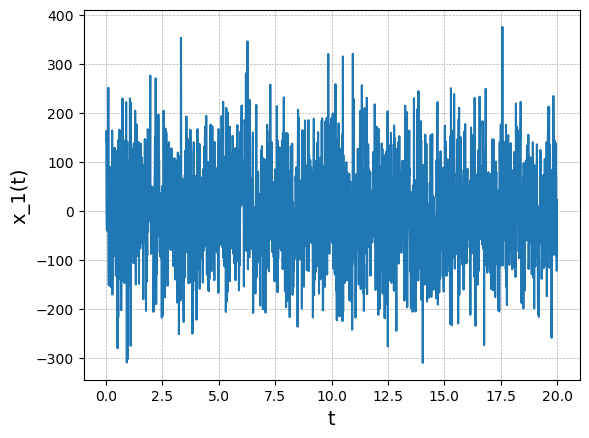

In [35]:
# simulate a random gaussian process

n = len(t)
x_1 = 100*np.array([np.random.normal(0, 1, size=n)])

plt.plot(t,x_1[0,:])
plt.xlabel('t', fontsize=14)
plt.ylabel('x_1(t)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


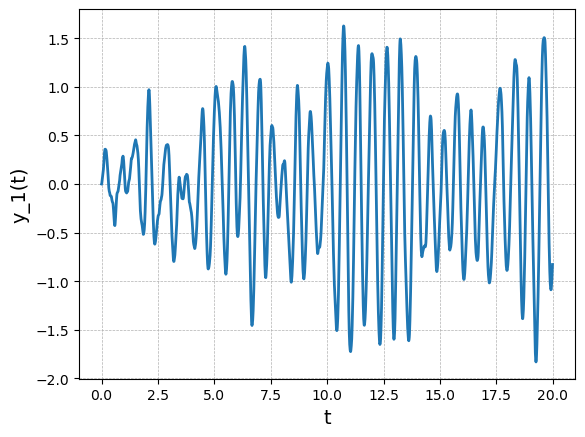

In [36]:
# calulate the response
y_1, ydot_1, y2dot_1 = linear_newmark_krenk(m,c,k,x_1,u0,udot0,dt,gamma,beta)

# plot the response
# plot the time series of the loading      
plt.plot(t,y_1[0,:], linewidth=2)
plt.xlabel('t', fontsize=14)
plt.ylabel('y_1(t)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


we see that the response does not have a steady-state as before, since the loading is random.

the loading was wide-banded, with many frequencies.

the response is narrow-banded. Its concentrated to the natural frequency of the system.

repeat to see the changes. 

(2000,)